## CMPINF 2110 Spring 2023 - Week 1
## Exploring Airfoil Data

### Dataset location
https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise

### Dataset
airfoil_self_noise.dat

In [1]:
# Import Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [2]:
file_path = "airfoil_self_noise.dat"

In [3]:
df = pd.read_csv(file_path, header = None, sep = "\t")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1503 non-null   int64  
 1   1       1503 non-null   float64
 2   2       1503 non-null   float64
 3   3       1503 non-null   float64
 4   4       1503 non-null   float64
 5   5       1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [6]:
headers = ["frequency", "aoa", "chord", "velocity", "displacement", "decibels"]

In [7]:
print(type(headers))

<class 'list'>


In [9]:
df1 = pd.read_csv(file_path, names = headers, sep = "\t")

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frequency     1503 non-null   int64  
 1   aoa           1503 non-null   float64
 2   chord         1503 non-null   float64
 3   velocity      1503 non-null   float64
 4   displacement  1503 non-null   float64
 5   decibels      1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1503 non-null   int64  
 1   1       1503 non-null   float64
 2   2       1503 non-null   float64
 3   3       1503 non-null   float64
 4   4       1503 non-null   float64
 5   5       1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [12]:
df.columns = headers

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   frequency     1503 non-null   int64  
 1   aoa           1503 non-null   float64
 2   chord         1503 non-null   float64
 3   velocity      1503 non-null   float64
 4   displacement  1503 non-null   float64
 5   decibels      1503 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 70.6 KB


In [14]:
df.head(10)

,frequency,aoa,chord,velocity,displacement,decibels
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461
5,2500,0.0,0.3048,71.3,0.002663,125.571
6,3150,0.0,0.3048,71.3,0.002663,125.201
7,4000,0.0,0.3048,71.3,0.002663,123.061
8,5000,0.0,0.3048,71.3,0.002663,121.301
9,6300,0.0,0.3048,71.3,0.002663,119.541


In [15]:
df.reset_index()

,index,frequency,aoa,chord,velocity,displacement,decibels
0,0,800,0.0,0.3048,71.3,0.002663,126.201
1,1,1000,0.0,0.3048,71.3,0.002663,125.201
2,2,1250,0.0,0.3048,71.3,0.002663,125.951
3,3,1600,0.0,0.3048,71.3,0.002663,127.591
4,4,2000,0.0,0.3048,71.3,0.002663,127.461
...,...,...,...,...,...,...,...
1498,1498,2500,15.6,0.1016,39.6,0.052849,110.264
1499,1499,3150,15.6,0.1016,39.6,0.052849,109.254
1500,1500,4000,15.6,0.1016,39.6,0.052849,106.604
1501,1501,5000,15.6,0.1016,39.6,0.052849,106.224


In [23]:
df_lf = df.reset_index().copy().melt(id_vars=["index"], value_vars=headers)

In [18]:
1503 * 6

9018

In [25]:
df_lf.loc[df_lf["index"] == 1, :]

,index,variable,value
1,1,frequency,1000.000000
1504,1,aoa,0.000000
3007,1,chord,0.304800
4510,1,velocity,71.300000
6013,1,displacement,0.002663
7516,1,decibels,125.201000


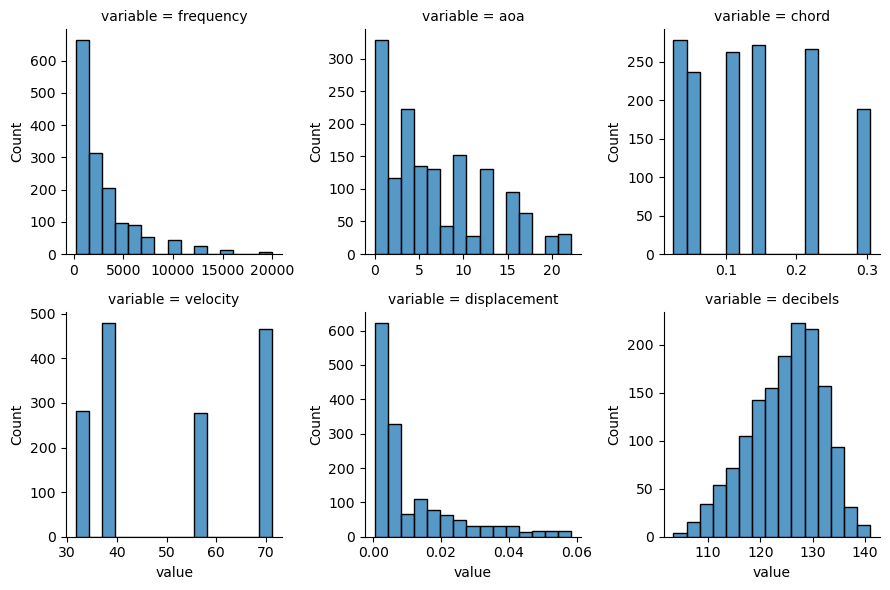

In [27]:
g = sns.FacetGrid(data=df_lf, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="value", bins=15)
plt.show()

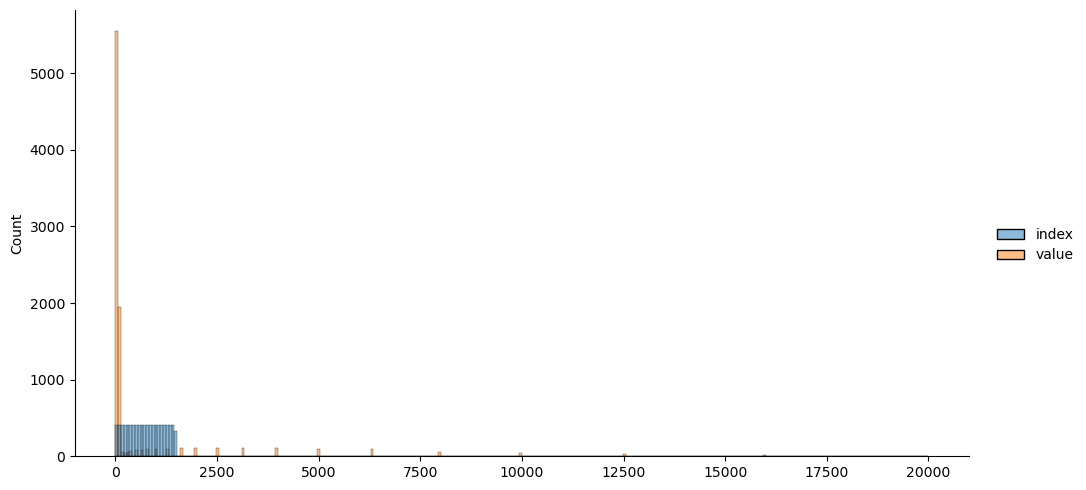

In [28]:
sns.displot(data=df_lf, kind="hist", aspect=2)
plt.show()